In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Analyzing the data from sphppi sucessful(-ish) run

Ensured that the pressure outside is 1/r

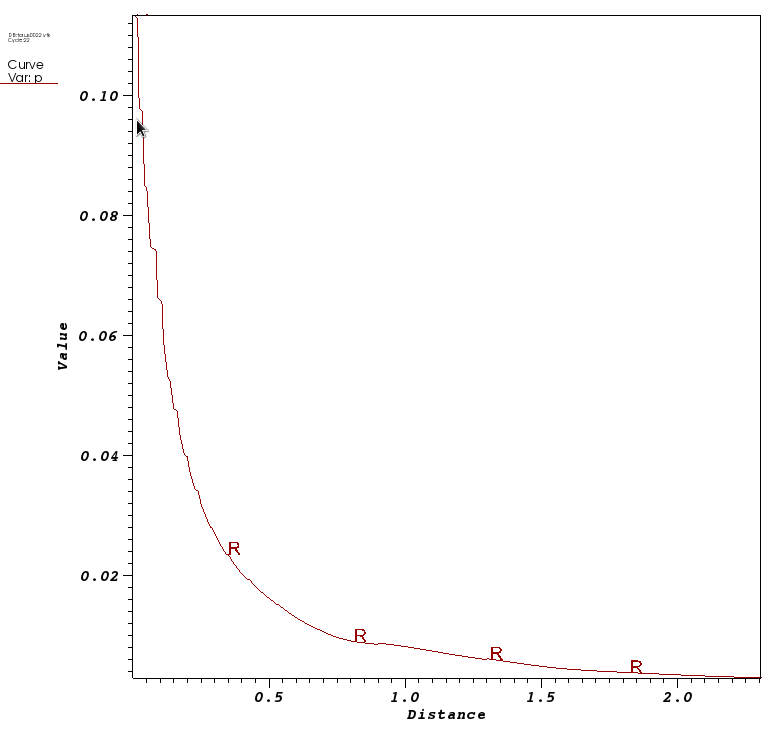

In [124]:
from IPython.core.display import Image
Image(filename="../../data/sphppi3D/pressure.png",width=500)

Also learned how to export data ("Export Database")

In order to make sure you get the right data

- 1) select the Lineout mode and draw the line
- 2) Then right click on the plot to Window->Make active
- 3) Go to the ribbon File-->Export Database
- 4) Export to "Curve2D" which returns your X and Y variables in your plot in a nice format and save accordingly

### Ambient Pressure

This is pressure in the initial condition, but "pressure" in blue is the internal energy, so it might be off by some factor ?

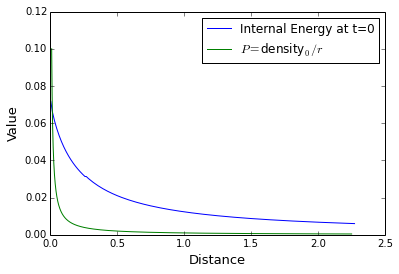

In [38]:
p = np.loadtxt("../../data/sphppi3D/pressure.curve",skiprows=1)
plt.plot(p[::,0],p[::,1],'-',label="Internal Energy at t=0")
rho0=0.001
r = np.linspace(0.01,2.25,100000)
p = rho0/r
plt.plot(r,p,'-',label = "$P=$density$_0/r$")
from matplotlib.legend_handler import HandlerLine2D
plt.legend(loc='upper right',prop={'size':12},numpoints=1)
plt.xlabel("Distance",fontsize=13)
plt.ylabel("Value",fontsize=13)

### Torus Rotational velocity

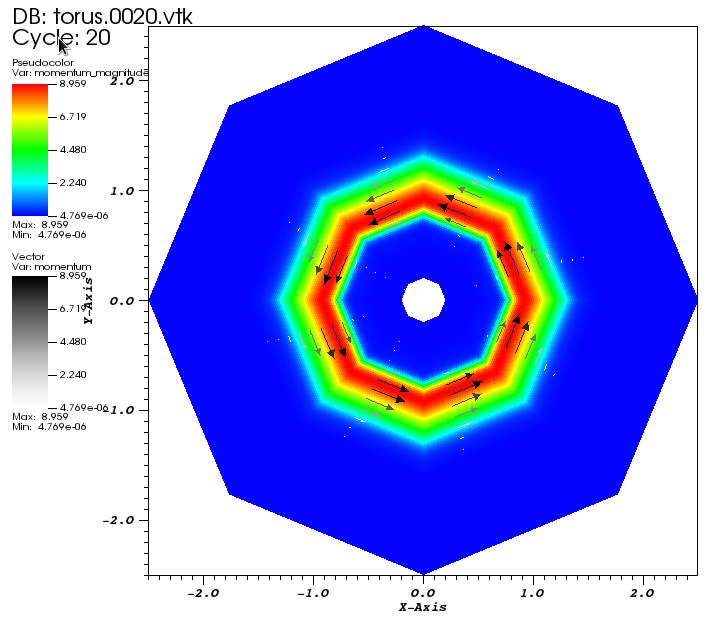

In [125]:
Image(filename="../../data/sphppi3D/vphi.png",width=500)

Momentum magnitude doesn't evolve throughout the whole t of the simulatin which makes sense since $V_\phi$ stays constant at every r . In all the plots , we see large values of phys qunatity at r =1 (density, pressure maximum) 

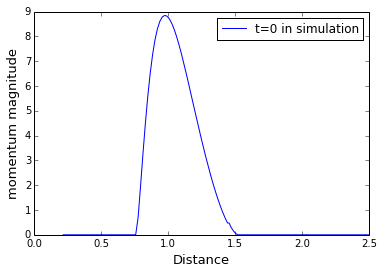

In [84]:
p = np.loadtxt("../../data/sphppi3D/momentum_mag.curve",skiprows=1)
plt.plot(p[::,0],p[::,1],'-',label="t=0 in simulation")
plt.legend(loc='upper right',prop={'size':12},numpoints=1)
plt.xlabel("Distance",fontsize=13)
plt.ylabel("momentum magnitude",fontsize=13)

Defining a quantity v_magnitude = momentum_magnitude/density since $p = \rho v$

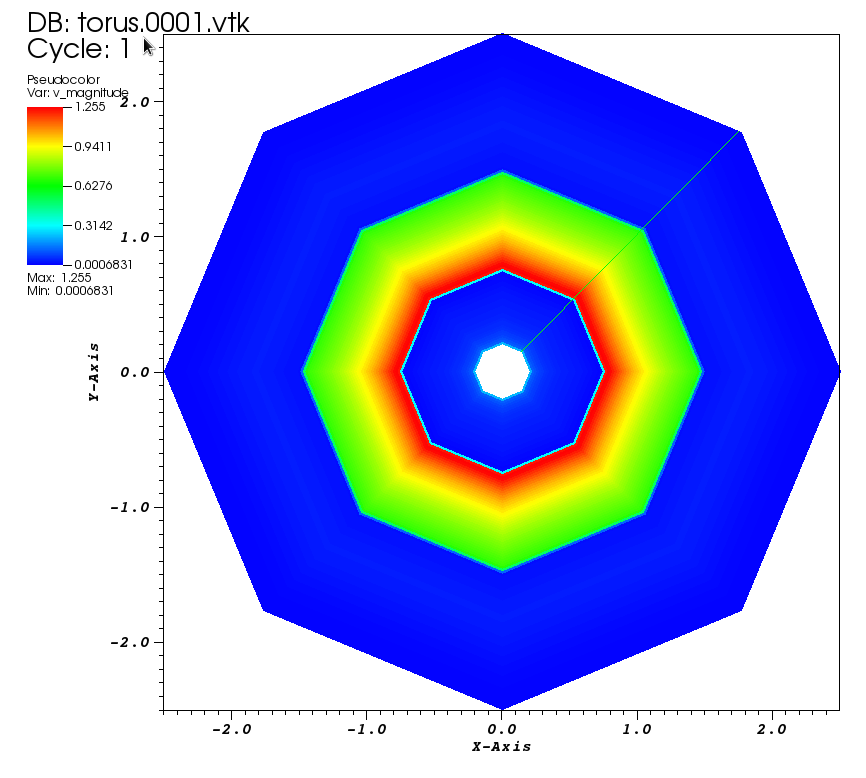

In [123]:
Image(filename="../../data/sphppi3D/v_mag.png",width=500)

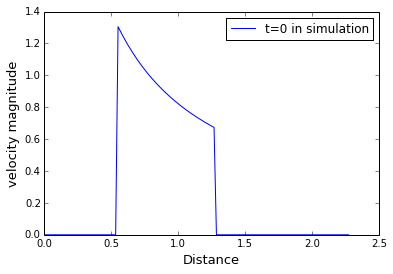

In [109]:
v = np.loadtxt("../../data/sphppi3D/v_mag.curve",skiprows=1)
plt.plot(v[::,0],v[::,1],'-',label="t=0 in simulation")
plt.legend(loc='upper right',prop={'size':12},numpoints=1)
plt.xlabel("Distance",fontsize=13)
plt.ylabel("velocity magnitude",fontsize=13)

Using this I could approximate the $w_+$ and $w_-$

In [120]:
region_of_interest = v[::,0][np.where(v[::,1]>0.5)[0]]
wminus= region_of_interest[0]
wplus = region_of_interest[-1]
print "wminus, wplus:",wminus, wplus

wminus, wplus: 0.553355 1.27007


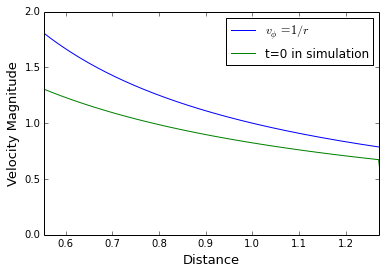

In [122]:
r = np.linspace(wminus,wplus,100000)
p = 1./r
plt.plot(r,p,'-',label = "$v_\phi=1/r$")
plt.xlabel("Distance",fontsize=13)
plt.ylabel("Velocity Magnitude",fontsize=13)
plt.plot(v[::,0],v[::,1],'-',label="t=0 in simulation")
plt.xlim(wminus,wplus)
plt.legend(loc='upper right',prop={'size':12},numpoints=1)

There might be some velcoity magnitude in the r and $\theta$ direction since we are taking the magnitude.(?)

###Torus Density

In [78]:
# G=1.
# M = 1.
# w0=1.
# n    = 1.5                  # Compressibility (n=1.5 for adiabatic)
# q    = 2                    #angular momentum distribution
# d    = 1.125              # distortion parameter
# theta=180.
# A =np.power((d-1)/(2*d),n)/(n+1)
# r_list = np.linspace(0.01,2.25,100000)
# rho=[]
# for r in r_list:
#     args = G*M/((n+1)*w0*A)*(w0/r-0.5*pow(w0/(r*sin(theta)),2)-0.5/d)
# #     print args
#     if args>0:
#         r =args**1.5
#     else:
#         r=0.001
#     rho.append(r)
# plt.plot(r_list,rho,'-',label = "$P=$density$_0/r$")

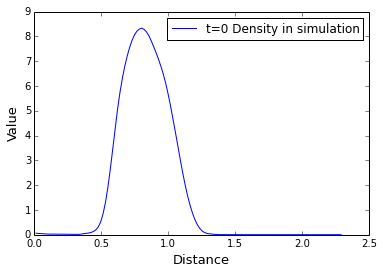

In [79]:
p = np.loadtxt("../../data/sphppi3D/density.txt",skiprows=1)
plt.plot(p[::,0],p[::,1],'-',label="t=0 Density in simulation")
plt.legend(loc='upper right',prop={'size':12},numpoints=1)
plt.xlabel("Distance",fontsize=13)
plt.ylabel("Value",fontsize=13)

# Using a debugger to debug fp error far into the simulation

I've noticed that in the screen session the code crashed very far out in the the simualtion 
```
cycle=123607 time=8.435364e+01 next dt=7.916113e-04 last dt=7.916208e-04
cycle=123608 time=8.435443e+01 next dt=7.916015e-04 last dt=7.916113e-04
cycle=123609 time=8.435522e+01 next dt=7.915915e-04 last dt=7.916015e-04
Floating point exception
```

We find that there is error in the same place as yesterday (this might be due to the fact that I change the d0 to 0.0001 to accord with Stone et al 1999 paper, we used 0.01 yesterday)
```
(gdb) print Wr
$5 = {d = -1.1569845473693996e-07, Vx = -0.024907326012800504, Vy = -0.019020853857245074, 
  Vz = 1.2474241215507933, P = 0.00014090713333994858}
```

So Ur also has a negative d, the left states W, U are okay

d0 is set as 43 which is big, but if I set d0 as the proper ambient density of 0.0001 then floating point error again ...
the $r, \theta,\phi$ that it crashes at is at : (23,18,3) which is not a boundary

The Vradial is very large!: V1 = 52776558133248.391

Judging by its r, this values lies outside the torus, Not sure why the radial is so large 

Why is the r value on the edge but not the i th values? 
```
(gdb) print x1
$20 = 2.5973627571512128
(gdb) print i
$21 = 23
```
If I break at one of the earlier time step and examine its Velocity we can see if this thing is really expanding out so fast .

I have changed omega_0 in the code so that it is 1.0, it is also defaulted set as 1.0 in the problem generator too.
For the first model it crashes again at 8.4e1 (after running for 6hrs) , bus error because I ran this inside gdb and I guess it took too long that gdb can not handle it anymore.
```
cycle=123607 time=8.435364e+01 next dt=7.916113e-04 last dt=7.916208e-04
cycle=123608 time=8.435443e+01 next dt=7.916015e-04 last dt=7.916113e-04
cycle=123609 time=8.435522e+01 next dt=7.915915e-04 last dt=7.916015e-04

Program received signal SIGFPE, Arithmetic exception.

Bus error
```

Re ran it with the boundary conditions set exactly the same as in Kengo's code.
```
cycle=276 time=1.356050e-02 next dt=4.550488e-05 last dt=4.552690e-05
cycle=277 time=1.360601e-02 next dt=4.548300e-05 last dt=4.550488e-05

Program received signal SIGFPE, Arithmetic exception.
0x000000339c8150f0 in __ieee754_sqrt () from /lib64/libm.so.6
Missing separate debuginfos, use: debuginfo-install glibc-2.12-1.149.el6_6.9.x86_64
```

So the code crashes because it tries to square root a negative density which is imaginary

I saw somewhere that n=5 in a local frame 2 but n=1.5 but that might be a local n , I have verified that n is correct in the printed IC.

# Running Models from Stone et al. 1999

- Rederived and Computed the values according to  Table 1 in Stone et al 1999 paper 
- Ran them all on separate ``screens`` and only E crashed right away , not too sure why